In [42]:
import pandas as pd
import numpy as np

%matplotlib inline

import viz
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
np.random.seed(20)

throws = np.array([1,2,3,4,5,6])

n_rolls = 50 # number of rolls
n_rows = 2  # a pair of rolls

###  1. How likely is it that you roll doubles when rolling two dice?

In [85]:

rolls = np.random.choice(throws, n_rolls * n_rows).reshape(n_rolls, n_rows)
rolls
# numpy syntax(numbers being randomly selected, # of spins) # reshaped to fit into list


array([[4, 3],
       [5, 3],
       [2, 5],
       [4, 3],
       [1, 1],
       [6, 3],
       [3, 4],
       [4, 1],
       [6, 1],
       [2, 6],
       [6, 3],
       [3, 6],
       [4, 3],
       [2, 4],
       [3, 4],
       [6, 6],
       [4, 2],
       [1, 3],
       [4, 4],
       [3, 4],
       [6, 6],
       [2, 1],
       [4, 1],
       [3, 3],
       [4, 4],
       [6, 6],
       [1, 3],
       [6, 2],
       [3, 4],
       [3, 2],
       [5, 5],
       [4, 4],
       [1, 3],
       [3, 4],
       [3, 3],
       [2, 6],
       [3, 2],
       [1, 3],
       [3, 5],
       [5, 4],
       [5, 1],
       [1, 4],
       [5, 1],
       [6, 6],
       [3, 2],
       [5, 5],
       [5, 1],
       [5, 2],
       [2, 4],
       [3, 2]])

In [99]:
df_rolls = pd.DataFrame(rolls)
df_rolls

,0,1
0,4,3
1,5,3
2,2,5
3,4,3
4,1,1
5,6,3
6,3,4
7,4,1
8,6,1
9,2,6


In [97]:
 
doubles = df_rolls.apply(lambda row: row[0] == row[1], axis = 1).sum()
doubles

12

In [98]:
chance_double = doubles / n_rolls
chance_double


0.24

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of  getting    more than three heads?

In [313]:
# 

flipped = np.array([0,1]) # heads = 1, tails = 0

n_flips = 1000
n_cols = 8

flip_trial = np.random.choice(flipped, n_flips * n_cols).reshape(n_flips, n_cols)
flip_trial


array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1]])

In [314]:
df_flip_trial = pd.DataFrame(flip_trial)
df_flip_trial

,0,1,2,3,4,5,6,7
0,1,0,0,1,0,0,1,1
1,1,0,0,1,1,0,1,0
2,1,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1
4,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
995,1,1,0,0,1,0,1,1
996,1,0,1,0,1,0,0,0
997,1,1,1,0,0,0,0,1
998,1,0,1,1,1,1,1,1


#### Exactly three heads

In [315]:
# Getting exactly 3 heads

triple_heads = np.sum(df_flip_trial, axis=1) == 3

triple_heads # Got it to be boolean, now i can add them up with sum()



0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996     True
997    False
998    False
999    False
Length: 1000, dtype: bool

In [316]:
triple_heads.head().sum()  
# Testing first five rows to see if it adds correctly. 

1

In [317]:
# used np.sum() function to add the 1's in the row. To do this, must use axis=1, otherwise it will add the column.
P_triple_heads = triple_heads.sum() / n_flips
P_triple_heads

0.202

#### More than three heads

In [318]:
# same code as above, just switched to 'more than' sign
three_plus_heads = np.sum(df_flip_trial, axis=1) > 3
three_plus_heads


0       True
1       True
2      False
3      False
4       True
       ...  
995     True
996    False
997     True
998     True
999     True
Length: 1000, dtype: bool

In [319]:
P_three_plus_heads = three_plus_heads.sum() / n_flips
P_three_plus_heads

0.672

### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the  two billboards I drive past both have data science students on them?

In [320]:
web_dev = 1
ds = 2

draws = 1000
c_rows = 1

billboard = np.random.choice([web_dev, web_dev, web_dev, ds], draws * c_rows).reshape(draws, c_rows)
billboard


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [321]:
df_billboard = pd.DataFrame(billboard) #turned into df to further manipulate/filter data
df_billboard

,0
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,2
998,2


In [322]:
ds_selected = np.sum(df_billboard, axis=1) == 2 
# used sum function to see if row is equal to 2 for ds
ds_selected

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998     True
999    False
Length: 1000, dtype: bool

In [323]:
ds_selected.sum() # count number of true rows

233

#### Percentage for 1 billboard

In [324]:
P_ds = ds_selected.sum() / draws # divided count of true rows by number of draws for percentage for
P_ds

0.233

#### Percentage for 2 billboards in a row

In [325]:
P_two_ds = P_ds * P_ds # multiply probability by itself to find probability to be on a second billboard
P_two_ds

0.054289000000000004

In [ ]:
# class review solution

Bbs = np.random.choice(outcomes, size=(n_simulations, n_billboards), P= [0.75, 0.25])

###  4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from   the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? 
### (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

In [327]:
# 3 poptars a day, 15 poptarts a week
# 17 poptarts restocked on Monday. Assuming machine was empty on Monday when it was restocked with 17 poptarts
# standard deviation = 1.5 a day, 

poptarts_day = 3
stock = 17
weekdays = 5
poptarts_week = poptarts_day * weekdays
std_dev = 1.5
simulations = 100


In [328]:
poptart_sample = np.random.normal(3, 1.5, size = [simulations, weekdays])
poptart_sample

array([[ 1.84741670e+00,  3.94247976e+00,  3.13762884e+00,
         2.33245486e+00, -2.94653511e-01],
       [ 2.29115437e+00,  4.34298607e+00,  1.98992999e+00,
        -3.75919030e-01,  1.92114883e+00],
       [ 6.20058397e+00,  2.89083217e+00,  1.78253343e+00,
         4.89366160e+00,  2.99076402e+00],
       [ 4.01558942e+00,  1.22845251e+00,  2.69653258e+00,
         2.81691229e+00,  2.03055534e+00],
       [ 5.69135687e+00,  3.48130483e+00,  7.85137595e-01,
         3.29372872e+00,  3.35131493e+00],
       [ 9.89466911e-01,  4.23570755e+00, -5.91948808e-01,
         1.72232230e+00,  3.33892570e+00],
       [ 3.21799705e+00, -7.19105995e-03,  4.87652047e+00,
         3.67584918e+00,  3.78294124e+00],
       [ 4.57995979e+00,  3.50874010e+00,  3.83934881e+00,
         6.63942131e+00,  4.12433979e+00],
       [ 2.18745515e+00,  2.89601435e+00,  4.90195908e+00,
         3.98004498e+00,  3.01277063e+00],
       [ 2.88441630e+00,  3.36575546e+00,  2.22575668e+00,
         2.61518964e+00

In [329]:
leftover = stock - poptart_sample.sum()
leftover
# crumbles are left for the next buyer on friday

-1497.0125406772797

In [330]:
pops_per_week = poptart_sample.sum(axis=1)
pops_per_week

array([10.96532664, 10.16930023, 18.75837518, 12.78804215, 16.60284294,
        9.69447365, 15.54611688, 22.69180981, 16.9782442 , 13.96393471,
       19.37119618, 16.31310053, 15.29598211, 12.22443545, 15.23772212,
       16.75843636,  9.737989  , 15.20456235, 19.52379457, 16.07905861,
       12.7326568 ,  6.39761152, 15.23339201, 19.12347151, 16.57845365,
       18.44451692, 15.66086107, 15.88434005, 10.82079723, 17.17771928,
       13.10154017, 12.36003091, 15.86008705, 16.97634748, 18.59009908,
       17.50587562, 11.73099757, 12.90382689, 14.07428985, 11.06186807,
       18.54377167, 17.31586425, 19.12623228, 12.49733612, 15.4856891 ,
       11.17729162, 16.56406095, 14.22245547, 10.61828015, 21.56731389,
       17.35812449, 16.69447995, 16.47395619, 14.62438025, 14.63687961,
        7.86010004, 19.15308463, 14.31135748, 10.90141766, 15.62561733,
       12.73903585,  9.78102127, 16.09483192, 13.50275516, 10.41712531,
       16.10903752, 10.92021781, 16.4823049 , 15.72028521, 15.03

In [331]:
(pops_per_week < 17).mean() # 76% chance there will be poptarts leftover for purchase

0.76

### # 5. Compare Heights
#### 5a. Men have an average height of 178 cm and standard deviation of 8cm.

In [29]:
men_height = 178
std_men = 8



#### 5b. Women have a mean of 170, sd = 6cm.


In [30]:
women_height = 170
std_women = 6


#### 5c. Since you have means and standard deviations, you can use np.random.normal to generate observations.


In [32]:
men_dist = np.random.normal(178,8,1000)
men_dist


array([175.32363641, 179.04734284, 180.6201843 , 180.58735958,
       181.22470122, 185.54052615, 176.26482411, 177.89592577,
       176.36294121, 182.73763987, 166.05789224, 172.56786754,
       181.77153559, 176.19785457, 181.74651921, 180.05537589,
       163.98062047, 177.97613274, 172.22799891, 167.26017013,
       199.79015373, 168.30427546, 170.88987075, 176.53433241,
       176.47809681, 176.56210944, 177.8271246 , 172.60554523,
       166.40342661, 178.98478186, 185.961131  , 174.88872496,
       181.45831971, 190.1870095 , 172.29854771, 166.31893007,
       169.97826163, 180.20361147, 176.63750069, 182.66791743,
       165.78050007, 184.07479493, 179.45261661, 181.63052186,
       178.2151635 , 177.11278095, 185.85391721, 182.69934696,
       182.48720222, 199.41955786, 190.58231199, 179.63798865,
       164.82497109, 173.64368041, 171.69052253, 187.25205583,
       188.82515475, 174.71066088, 186.9649949 , 166.86242845,
       175.75000031, 180.05812419, 179.5743974 , 173.70

In [51]:
women_dist = np.random.normal(170,6,1000)
women_dist

array([160.8177633 , 172.57807292, 177.96449378, 166.77215076,
       168.22084711, 172.15252151, 175.23575798, 168.06217268,
       163.34177595, 168.68666197, 167.80442836, 165.10339774,
       180.23838224, 171.67104915, 172.72202376, 167.4257942 ,
       180.29645171, 157.92672055, 160.76156242, 168.41787586,
       172.64831269, 176.94406359, 164.14034862, 166.75620448,
       168.98404373, 165.53838327, 170.60509629, 159.59193673,
       181.91597575, 169.62935411, 174.19677269, 172.96097517,
       173.38767153, 176.89358396, 175.0701881 , 163.29004974,
       169.80175686, 178.55408373, 168.88867464, 163.05404854,
       164.66247969, 171.95319775, 169.73611689, 168.20842283,
       166.19189336, 170.37956069, 174.92430105, 167.45637202,
       169.00242435, 165.4901944 , 172.98588154, 162.69189716,
       176.05236864, 160.91776202, 169.56010577, 173.99132335,
       184.13304649, 175.06738049, 166.50927562, 176.94138807,
       170.97686244, 162.43638155, 169.37292065, 160.89

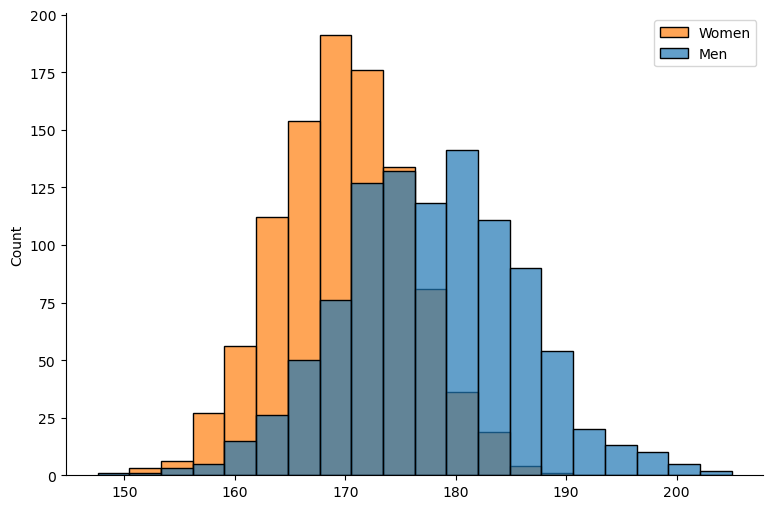

In [58]:
sns.histplot([men_dist, women_dist], bins=20, alpha=.7)
plt.legend(["Women","Men"])

#### 5d. If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?


In [68]:
# Get random selection trial of men and women, with two columns, then see how many times a woman is taller.

mf_trials = 500
mf_rows = 2
total_dist = men_dist + women_dist
mf_selection = np.random.random_sample(total_dist, mf_trials * mf_rows).reshape(mf_trials,mf_rows) #this doesnt work


TypeError: random_sample() takes at most 1 positional argument (2 given)

In [74]:
# Get two seperate samples individually, make dataframe, add female results to dataframe. compare results

m_trials = np.random.choice(men_dist, mf_trials)
m_trials


array([191.14912478, 180.20785488, 187.96006401, 176.36294121,
       175.32363641, 178.08347918, 193.49461011, 154.17716483,
       189.27992228, 177.8271246 , 184.2441792 , 178.2151635 ,
       171.60260288, 181.32441035, 178.37707605, 169.56550056,
       167.79973439, 186.4917132 , 192.05647628, 175.44176448,
       185.94147132, 183.7069567 , 175.98642663, 201.13139044,
       165.78751507, 191.74545165, 175.02526028, 174.39015514,
       176.4804232 , 183.91294013, 173.7037724 , 170.57996772,
       179.0633362 , 163.36738851, 167.71441692, 191.10846952,
       166.65546885, 184.11402772, 173.40599964, 162.83973939,
       174.2877497 , 162.83973939, 183.38060554, 185.76904477,
       169.28900992, 181.78916643, 176.33374299, 179.06567197,
       170.44432859, 182.68125794, 175.54659027, 183.16151269,
       171.32675993, 177.5643044 , 169.77395179, 173.20076794,
       170.28109148, 183.84480242, 176.1099644 , 175.02526028,
       200.33299939, 184.82069326, 182.48720222, 167.59

In [99]:
# turn into dataframe
df_mf_trials = pd.DataFrame(m_trials)
df_mf_trials = df_mf_trials.rename(columns = {0:"Men"})

In [100]:
df_mf_trials

,Men
0,191.149125
1,180.207855
2,187.960064
3,176.362941
4,175.323636
...,...
495,184.562818
496,188.528949
497,186.439344
498,177.684253


In [88]:
w_trials = np.random.choice(women_dist, mf_trials)
w_trials

array([171.30652543, 168.43290513, 168.07643   , 169.7439828 ,
       160.89904002, 167.75267358, 168.07643   , 166.42988621,
       161.02279901, 164.30526499, 169.90379473, 170.50081138,
       172.57545952, 169.86052051, 167.67698127, 171.10624529,
       168.28446725, 166.85799635, 175.46908442, 166.71532367,
       165.78119301, 167.72322537, 168.1408225 , 157.99168876,
       173.519245  , 172.62072343, 173.27568721, 167.55570213,
       172.62798444, 175.23575798, 177.99469815, 165.5358491 ,
       179.38724181, 171.98442684, 162.10674027, 181.64390126,
       169.43705685, 163.0635475 , 182.88100963, 164.80570946,
       175.03245976, 173.36350886, 164.34192678, 173.62703057,
       174.843475  , 157.01839078, 166.18126304, 172.17709796,
       182.31671678, 169.40323257, 170.60509629, 161.36990154,
       172.50279493, 163.19441254, 171.98278252, 156.12731154,
       179.95930756, 173.13754004, 169.04703399, 162.18416066,
       170.88283889, 167.67698127, 177.99760494, 170.32

In [101]:
df_mf_trials["Women"] = w_trials
df_mf_trials

,Men,Women
0,191.149125,171.306525
1,180.207855,168.432905
2,187.960064,168.076430
3,176.362941,169.743983
4,175.323636,160.899040
...,...,...
495,184.562818,159.937601
496,188.528949,172.575460
497,186.439344,173.564031
498,177.684253,174.468573


In [110]:
# new idea, even more simpler than making dataframe then comparing. just compare the two arrays directly.

women_taller = women_dist > men_dist
women_taller 
# got boolean values, count True values with sum()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [111]:
women_taller.sum()

199

In [115]:
# divide above number by total people available for the trials
P_women_taller = women_taller.sum() / (len(men_dist) + len(women_dist))
P_women_taller

0.0995

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?


In [192]:
conda_fail = 249


In [193]:
fifty_conda_installs = np.random.choice(range(250), 50)
fifty_conda_installs

array([ 46, 138,  76, 243,  35,   5, 174, 234, 241, 162, 224, 151,  23,
       107,  25,  49,  94, 173, 173,  86, 154,  29, 112, 234, 146,  99,
       120, 189, 216,  13,  90, 173, 157,  92,  94,  90, 162, 107, 114,
        68,  45, 163, 242, 203,   0,   1,  92, 224, 249,   8])

In [194]:
P_conda_fail_fifty = fifty_conda_installs == conda_fail

In [195]:
# Percentage of people who had install fails out of 50 installs
P_conda_fail_fifty.sum() / 50

0.02

In [205]:
hundred_conda_installs = np.random.choice(range(250), 100)
hundred_conda_installs

array([ 94, 164, 206, 101, 154, 167, 141,  20, 203, 139, 217,  14, 191,
        61,  86, 194, 182,  59, 117,  17,  51,  10,  70,   7, 237,  88,
       228, 202, 160, 228, 173, 181,   4, 230,  12,  57, 126, 234,  50,
        41, 189, 220, 185,  14,  41,  36,  10, 182, 106,  57, 183,   3,
       219,  39, 159,  34, 155,  15, 189,  76, 127, 209, 182, 116,  71,
       184, 219, 207, 119, 222,  80,   1,  26, 146, 204,  32, 133, 199,
        78, 129, 159,  97,  82, 209,  38,  78, 196, 130, 173,  48,  41,
       232,  88,  57,  23,  16, 135,  91, 110, 249])

In [206]:
P_conda_fail_hundred = hundred_conda_installs == conda_fail

In [207]:
# of 250 people, 100 people chosen, there was 1% or 1person who had a failed install
P_conda_fail_hundred.sum() / 100

0.01

#### 6a. What is the probability that we observe an installation issue within the first 150 students that download anaconda?


In [235]:
hundredfifty_conda_installs = np.random.choice(range(250), 150)
hundredfifty_conda_installs


array([152, 105,   7,  26,  66, 119, 106, 144, 103, 199, 187, 158, 174,
       218, 207, 134, 236, 118, 198, 196,  87, 204,  53, 114,  73,  23,
       225, 197, 217, 225, 147,  19, 240, 150,  92, 123, 121,  33, 149,
       108, 222,  37, 249, 168,  23,  36, 220, 176, 137, 208,  82,  26,
         6,  36, 144,  20,  54, 207,  62, 138,  79, 130, 145,  78, 207,
       232, 112, 198, 232, 214,  30,   0, 115, 158, 173,  50, 104, 165,
       173, 219,  86,  84,  61, 150, 146,  64,  79, 116, 202, 216,  82,
       214,   7,  58,  67,  10, 162,  17, 215,  21,  98,  32, 146, 176,
        47,  36, 173, 184, 138, 227,   3, 206,  92, 203, 156,  78, 198,
       189, 237, 199, 180, 245,   8, 126,  61, 173, 197, 206,  21, 113,
       117,  66, 198, 231, 161, 172, 184, 120, 148, 249,  28,  98, 229,
        72, 131, 134,  27,  92, 104, 236])

In [236]:
P_conda_fail_hundredfifty = hundredfifty_conda_installs == conda_fail
P_conda_fail_hundredfifty

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [238]:
# 1.3% chance out of 150 that there will be a failed install
P_conda_fail_hundredfifty.sum() / 150

0.013333333333333334

#### 6b. How likely is it that 450 students all download anaconda without an issue?


In [239]:
fourfifty_conda_installs = np.random.choice(range(250), 450)
fourfifty_conda_installs


array([ 13, 196,  34,  46, 107, 143, 222,  65, 147, 140,  13,  48, 243,
        31, 107,  98, 117, 203,  29,  62, 224,  84,  72, 109, 214,  71,
       168,  61,  91, 160,  94, 230, 168,  36, 141, 170, 221,  66,  66,
       219, 160, 120,  17,  24, 118, 143, 214, 206, 210, 114,  46, 188,
       200, 233, 197, 197, 219, 186, 136,  94, 197, 131, 194, 114, 232,
        75,  94,  83, 243, 159, 212,   1, 238,  50, 208, 140, 231, 134,
         2, 245,  17, 165, 156, 142,  70,  94, 178, 158, 120, 146,  68,
       120,  44, 149,  18, 153, 175, 100, 109,  86, 190, 163,   6,  60,
        88, 184, 172,  85,  16, 224, 113,  73, 151, 151,   6, 221, 128,
        60, 238, 173,  63,  70, 103,  43,  60, 249, 174, 147,  71,  97,
       133, 118, 244,   7, 128,  77, 135, 133, 127, 134,  15,  49, 168,
       163,  41, 199, 141,  54,  86,  53, 213, 174, 242, 131,  82, 175,
       202, 105, 125,  16, 117, 124,  74, 161, 213, 162,  75,  17, 246,
       201, 109, 235,  83, 103, 176, 166, 166, 177, 156, 194, 14

In [242]:
P_fourfifty_conda_installs = fourfifty_conda_installs == conda_fail
P_fourfifty_conda_installs

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [243]:
# 0.8 chance there is failed install during 450 trials
P_fourfifty_conda_installs.sum()/ 450

0.008888888888888889

In [337]:
# class review solution
outcomes = ['S','F']
students = 100
simulations = 1000

In [339]:
np.random.choice(outcomes, size=(simulations, students), p = [249/250, 1/250])

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park.However, you haven't seen a food truck there in 3 days. How unlikely is this?


In [281]:
truck_rows = 1000
truck_cols = 3

In [283]:
# np.random.binomial(n_trials (this is show/no show for the truck), probability, times tested(3 days))


food_truck_there = np.random.binomial(1, 0.7, truck_rows * truck_cols).reshape(truck_rows, truck_cols)
food_truck_there


array([[1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [294]:
df_food_truck_there = pd.DataFrame(food_truck_there)
df_food_truck_there = df_food_truck_there.rename(columns ={0: 'Mon', 1:'Tue', 2: 'Wed'})
df_food_truck_there

,Mon,Tue,Wed
0,1,1,0
1,1,1,1
2,1,1,1
3,0,1,1
4,0,1,1
...,...,...,...
995,1,1,0
996,1,0,0
997,1,0,1
998,0,1,1


In [286]:
people_hungry = np.sum(df_food_truck_there, axis=1) == 0
people_hungry

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [287]:
people_hungry.sum() # number of times there was no food truck 3 days in a rows

19

In [288]:
# 1.9% times the food truck was a no show 3 days in a row
P_people_hungry = people_hungry.sum() / 1000
P_people_hungry

0.019

#### 7b. How likely is it that a food truck will show up sometime this week?


In [297]:
food_truck_there_now = np.random.binomial(1, 0.7, truck_rows * 4).reshape(truck_rows, 4)
food_truck_there_now


array([[1, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 0, 0, 1],
       ...,
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 0]])

In [299]:
df_food_truck_there_now = pd.DataFrame(food_truck_there_now)

In [300]:
df_food_truck_there_now = df_food_truck_there_now.rename(columns = {0:'Thu', 1: 'Fri', 2: 'Sat', 3: 'Thu'}) 
df_food_truck_there_now 

,Thu,Fri,Sat,Thu
0,1,1,1,0
1,1,0,1,1
2,1,0,0,1
3,1,1,1,1
4,0,0,1,1
...,...,...,...,...
995,1,0,1,1
996,0,1,1,1
997,0,1,1,1
998,1,0,0,0


In [301]:
no_hungry = np.sum(df_food_truck_there, axis=1) >= 1
no_hungry

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [302]:
# 98.1% chance that it will show up at least one day for the rest of the week
no_hungry.sum() / 1000

0.981

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?



In [304]:
bday_rows = 1000
bday_cols = 20

In [305]:
double_bday = np.random.choice(range(365), bday_rows * bday_cols).reshape(bday_rows, bday_cols)
double_bday


array([[327, 219, 182, ...,  30, 258, 343],
       [ 42,  35,  66, ..., 287,  29, 358],
       [262, 170,  92, ..., 241, 309,  18],
       ...,
       [225, 274, 207, ..., 281, 148, 125],
       [165,  85,  23, ..., 159, 283, 176],
       [304, 246, 172, ..., 118, 225, 227]])

In [308]:
df_double_bday = pd.DataFrame(double_bday)
df_double_bday

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,327,219,182,161,107,304,296,251,260,156,40,298,122,323,145,308,86,30,258,343
1,42,35,66,1,113,6,125,302,177,4,193,136,177,231,239,324,361,287,29,358
2,262,170,92,65,194,212,33,328,101,121,8,179,260,286,304,48,206,241,309,18
3,74,152,209,203,152,55,150,10,281,185,331,118,215,170,146,343,182,28,213,98
4,94,32,156,170,265,122,89,196,224,125,304,73,223,36,349,32,334,191,176,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,150,287,353,303,215,225,253,8,20,332,125,156,129,249,195,236,229,238,187,12
996,97,72,227,55,125,243,10,325,215,140,285,213,40,28,82,165,361,164,201,113
997,225,274,207,81,237,279,72,12,150,349,124,306,323,172,232,218,335,281,148,125
998,165,85,23,337,342,10,348,126,238,306,142,197,121,148,224,301,329,159,283,176


In [311]:
pd.df_double_bday.column-name.unique()

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [340]:
# class review solution
results = range(1,366)
n_students = 23

In [342]:
birthdays = np.random.choice(results, size =( 1000, n_students))
birthdays

array([[234, 168, 232, ..., 287, 268, 345],
       [319,  46, 116, ...,  46, 223, 101],
       [153,  86, 171, ..., 196, 281, 109],
       ...,
       [177, 249,   3, ...,  67, 210,  75],
       [179, 122,  18, ..., 315, 269,  73],
       [231,  56, 151, ..., 231, 343, 134]])

In [344]:
df_birth_days = pd.DataFrame(birthdays)
df_birth_days.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,234,168,232,230,259,250,31,130,34,317,...,154,140,258,290,5,48,314,287,268,345
1,319,46,116,203,260,21,262,153,188,75,...,186,329,347,317,212,342,281,46,223,101
2,153,86,171,8,294,14,260,116,132,113,...,237,286,130,226,109,96,163,196,281,109
3,330,354,362,349,217,283,299,144,92,149,...,344,220,65,202,115,127,70,305,108,189
4,348,289,234,81,224,1,10,272,334,262,...,102,287,126,42,185,197,83,113,159,355


In [345]:
(df_birth_days.nunique(axis=1) < 20).mean()

0.005